<a href="https://colab.research.google.com/github/anjaleeDS/MLCS68/blob/master/01hwTelco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [3]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telco_data.Churn.value_counts()

No     3738
Yes    1332
Name: Churn, dtype: int64

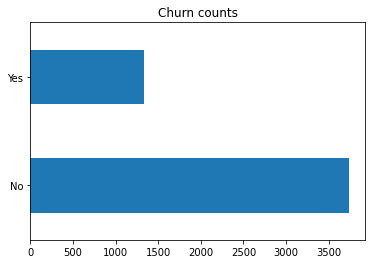

In [5]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [6]:
telco_data.Churn = telco_data.Churn.replace({'Yes':1, 'No':0}) # Replacing 'Yes' and 'No' with numerical values

In [7]:
y = telco_data.pop('Churn') # Removing Churn field and storing it in variable y
X = telco_data[['SeniorCitizen', 'tenure']] # Creating a smaller subset of features

In [8]:
telco_data.PaymentMethod.value_counts()

Electronic check             1691
Mailed check                 1153
Bank transfer (automatic)    1116
Credit card (automatic)      1110
Name: PaymentMethod, dtype: int64

# Splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
X_train.head()

,SeniorCitizen,tenure
4393,0,21
3839,0,15
4190,0,11
1800,0,1
4458,0,38


# Fitting model

In [11]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

# Evaluating model

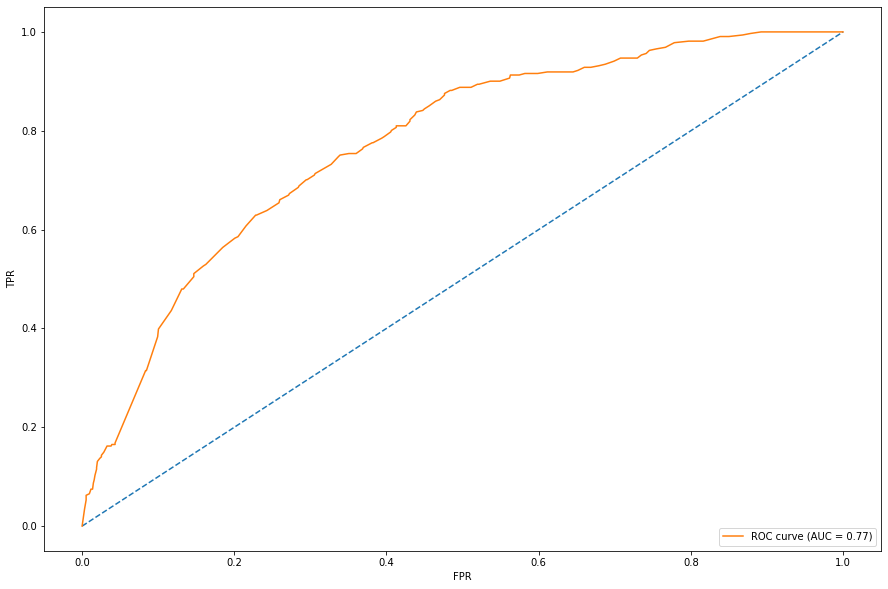

In [12]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

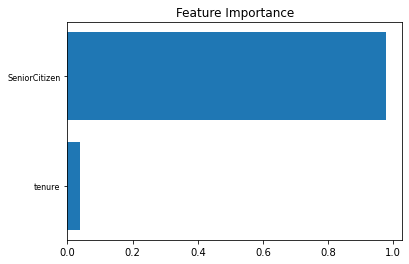

In [13]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

#My tests

## PaymentMethod, Multiple Lines, InternetService, Contract

In [14]:
# copy telco_data for safety
master_telco_data = telco_data
# drop customerID
telco_data.drop(columns='customerID', inplace=True)

#1. get all columns that are non-numeric
categorical_cols = telco_data.columns[telco_data.dtypes=='object'].tolist()

#2. get all columns that are binary and change WITHIN the original dataframe and
# them using LabelEncoder (incremental coding) because order does not matter
binary_columns = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() == 2].index.tolist()

# Transform binary_columns
for column in binary_colmmns:
  telco_data[column] = LabelEncoder().fit_transform(telco_data[column])

#3. get all columns that are non-binary and change them using pd.get_dummies 
multi_valued_cols = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() > 2].index.tolist()
dummies_adjusted_data = pd.get_dummies(data=telco_data, columns=multi_valued_cols, drop_first=True )

#4. combine the dummy data and now, encoded binary columns together


In [40]:

# telco_data[categorical_cols].nunique()#[telco_data[categorical_cols].nunique() == 2].index.tolist()

# binary_colmmns = churn_data[categorical_cols].nunique()[churn_data[categorical_cols].nunique() == 2].index.tolist()


gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        4774
dtype: int64

In [15]:
multi_valued_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'TotalCharges']

In [16]:
#make new df
x1 = telco_data[['Contract', 'InternetService', 'MultipleLines', 'PaymentMethod']]
#split data
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25)
x1_train.head()


,Contract,InternetService,MultipleLines,PaymentMethod
1636,One year,No,Yes,Bank transfer (automatic)
3553,Two year,No,Yes,Bank transfer (automatic)
3990,Month-to-month,Fiber optic,No,Electronic check
4726,Two year,DSL,No phone service,Electronic check
3701,Two year,No,Yes,Electronic check


In [17]:
#fit model
my_clf = LogisticRegression().fit(x1_train,y_train)
#predict probabilities
my_predictions = my_clf.predict_proba(x1_test)[:,1]

ValueError: ignored